In [1]:
pip install darts

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from darts import TimeSeries

In [3]:
df = pd.read_csv('..\datasets\Plasma current.csv',usecols=[1]).clip(0)

In [4]:
df

,Plasma_current
0,0.0000
1,1.3591
2,5.7585
3,11.6940
4,17.8730
...,...
400995,0.0000
400996,0.0000
400997,0.0000
400998,0.0000


In [5]:
dates = pd.date_range(start='1/1/1900',periods=len(df), freq='h')

In [6]:
df.index = pd.to_datetime(dates, format='%d.%m.%Y %H:%M:%S')

In [7]:
df[:400].tail()

,Plasma_current
1900-01-17 11:00:00,0.0
1900-01-17 12:00:00,0.0
1900-01-17 13:00:00,0.0
1900-01-17 14:00:00,0.0
1900-01-17 15:00:00,0.0


In [8]:
df.tail()

,Plasma_current
1945-09-30 03:00:00,0.0
1945-09-30 04:00:00,0.0
1945-09-30 05:00:00,0.0
1945-09-30 06:00:00,0.0
1945-09-30 07:00:00,0.0


In [9]:
series= TimeSeries.from_dataframe(df)

<Axes: xlabel='time'>

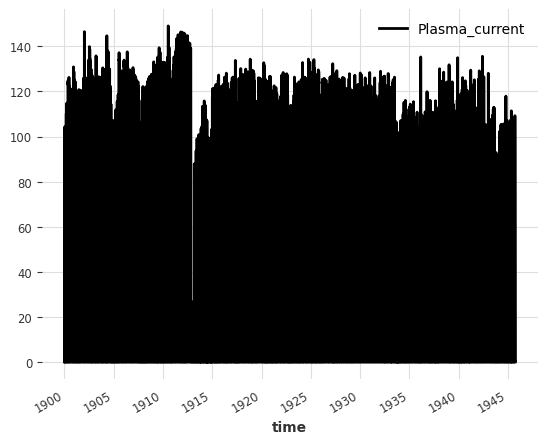

In [10]:
series.plot()

In [11]:
from darts.dataprocessing.transformers  import Scaler
scaler = Scaler()
series_scaled = scaler.fit_transform(series)

<Axes: xlabel='time'>

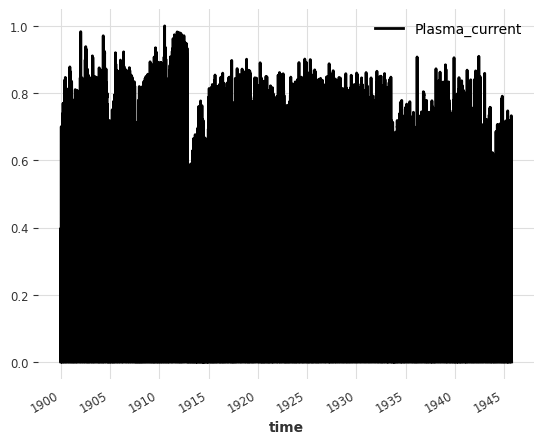

In [12]:
series_scaled.plot()

<Axes: xlabel='time'>

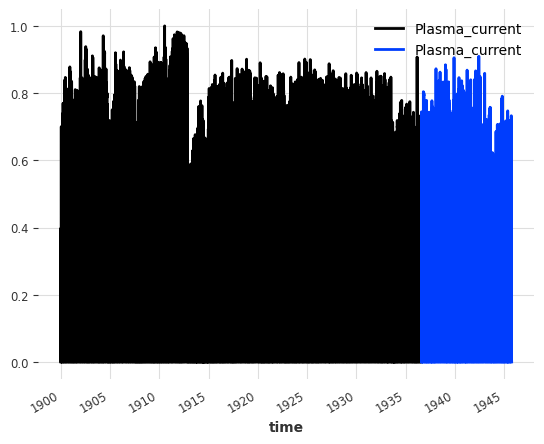

In [13]:
train, test = series_scaled.split_after(0.8)
train.plot()
test.plot()

In [14]:
len(test)

80200

In [15]:
from darts.models import RNNModel , TCNModel,  TransformerModel, NBEATSModel, BlockRNNModel, ExponentialSmoothing, LinearRegressionModel
from darts.metrics import mse, mape

In [16]:
model = NBEATSModel(
    input_chunk_length=10,
    output_chunk_length=20,
    n_epochs=10,
    activation='LeakyReLU'
)

In [ ]:
model.fit(train)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.1 M 
---------------------------------------------------
6.1 M     Trainable params
1.3 K     Non-trainable params
6.1 M     Total params
24.353    Total estimated model params size (MB)


Training: |                                                                                      | 0/? [00:00<…

In [ ]:
pred = model.predict(n=20,series=test[0:10])
test[0:400].plot()
pred.plot()

In [ ]:
model.save('Darts2.keras')

In [ ]:
model.save('bart2.h5')

In [ ]:
df = pd.read_csv('/content/test_10-20.csv')

In [ ]:
df

In [ ]:
x_test1= df.iloc[:1,1:11]

In [ ]:
x_test1

In [ ]:
x_test1 = x_test1.stack().unstack(0).sort_index(level=0)

In [ ]:
x_test1

In [ ]:
dates = pd.date_range(start='1/1/1900',periods=len(x_test1), freq='h')

In [ ]:
x_test1.index = dates

In [ ]:
x_test1

In [ ]:
x_test1.columns

In [ ]:
series= TimeSeries.from_dataframe(x_test1)

In [ ]:
model.predict(n=20,series=series)

In [ ]:
y_test1 = df.iloc[:1,11:21]

In [ ]:
y_test1

In [ ]:
x_test2= df.iloc[1:2,1:11]

In [ ]:
x_test2

In [ ]:
x_test2 = x_test2.stack().unstack(0).sort_index(level=0)

In [ ]:
x_test2.index = dates

In [ ]:
x_test2

In [ ]:
series= TimeSeries.from_dataframe(x_test1)

In [ ]:
model.predict(n=20, series=series)

In [ ]:
y_test1 = df.iloc[1:2,11:21]
y_test1

In [ ]:
x_test3 = df.iloc[100:101,1:11]

In [ ]:
x_test3 = x_test3.stack().unstack(0).sort_index(level=0)

In [ ]:
x_test3.index = dates

In [ ]:
x_test3

In [ ]:
series= TimeSeries.from_dataframe(x_test3)

In [ ]:
model.predict(n=20, series=series)

In [ ]:
y_test3 = df.iloc[100:101,11:21]

In [ ]:
y_test3

In [ ]:
x_test4 = df.iloc[545:546,1:11]

In [ ]:
x_test4 = x_test4.stack().unstack(0).sort_index(level=0)

In [ ]:
x_test4.index = dates

In [ ]:
series= TimeSeries.from_dataframe(x_test4)

In [ ]:
model.predict(n=20, series=series)

In [ ]:
y_test4 = df.iloc[545:546,11:21]

In [ ]:
y_test4